<a href="https://colab.research.google.com/github/Anirban-code/Bengali-Character-Recognition-Using-CNN-model/blob/main/CNNTEST3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unzip  Dataset

In [ ]:
from zipfile import ZipFile
file_name = "HandWritten.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


#Importing the libraries

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import ImageFile
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import regularizers
from keras.layers import BatchNormalization,Activation,Concatenate

# Data Preprocessing

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=.2, rotation_range=25)
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory('HandWritten/Training', target_size= (40, 40), 
                                               batch_size=32, class_mode='categorical')
test_set=test_datagen.flow_from_directory('HandWritten/Validation', target_size= (40, 40), 
                                          batch_size=32, class_mode='categorical')


Found 18000 images belonging to 50 classes.
Found 7000 images belonging to 50 classes.


# Building the CNN

In [ ]:
classifier=Sequential()
classifier.add(Conv2D(filters=128, kernel_size= (3, 3), activation='relu', input_shape= (40, 40, 3)))
classifier.add(MaxPooling2D(pool_size= (2, 2)))
classifier.add(Dropout(.2))
classifier.add(Conv2D(filters=64, kernel_size= (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size= (2, 2)))
classifier.add(Dropout(.2))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(.2))
classifier.add(Dense(units=50, activation='softmax'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 38, 38, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 19, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
history = classifier.fit(training_set,epochs=10,validation_data=test_set)

Epoch 1/10
563/563 [==============================] - 96s 169ms/step - loss: 3.1855 - accuracy: 0.1805 - val_loss: 0.9223 - val_accuracy: 0.7116
Epoch 2/10
563/563 [==============================] - 93s 166ms/step - loss: 1.3576 - accuracy: 0.5994 - val_loss: 0.6991 - val_accuracy: 0.7756
Epoch 3/10
563/563 [==============================] - 94s 167ms/step - loss: 1.0830 - accuracy: 0.6663 - val_loss: 0.6056 - val_accuracy: 0.8081
Epoch 4/10
563/563 [==============================] - 94s 167ms/step - loss: 0.8964 - accuracy: 0.7243 - val_loss: 0.5171 - val_accuracy: 0.8369
Epoch 5/10
563/563 [==============================] - 95s 168ms/step - loss: 0.8358 - accuracy: 0.7386 - val_loss: 0.5027 - val_accuracy: 0.8404
Epoch 6/10
563/563 [==============================] - 99s 175ms/step - loss: 0.7518 - accuracy: 0.7661 - val_loss: 0.4622 - val_accuracy: 0.8521
Epoch 7/10
563/563 [==============================] - 99s 175ms/step - loss: 0.7212 - accuracy: 0.7745 - val_loss: 0.4661 - val_ac

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Prediction Function

In [ ]:
def output(img):
  test_img=image.img_to_array(img)
  test_img=np.expand_dims(test_img,axis=0)
  pre=classifier.predict((test_img))
  res=np.argmax(pre,axis=1)
  if res == 0:
    print('prediction : অ')
  elif res == 1:
    print('prediction : আ')
  elif res == 2:
    print('prediction : ঋ')
  elif res == 3:
    print('prediction : ক')
  elif res == 4:
    print('prediction : খ')
  elif res == 5:
    print('prediction : গ')
  elif res == 6:
    print('prediction : ঘ')
  elif res == 7:
    print('prediction : ঙ')
  elif res == 8:
    print('prediction : চ')
  elif res == 9:
    print('prediction : ছ')
  elif res == 10:
    print('prediction : জ')
  elif res == 11:
    print('prediction : ঝ')
  elif res == 12:
    print('prediction : ই')
  elif res == 13:
    print('prediction : ঞ')
  elif res == 14:
    print('prediction : ট')
  elif res == 15:
    print('prediction : ঠ')
  elif res == 16:
    print('prediction : ড')
  elif res == 17:
    print('prediction : ঢ')
  elif res == 18:
    print('prediction : ণ')
  elif res == 19:
    print('prediction : ত')
  elif res == 20:
    print('prediction : থ')
  elif res == 21:
    print('prediction : দ')
  elif res == 22:
    print('prediction : ধ')
  elif res == 23:
    print('prediction : ঈ')
  elif res == 24:
    print('prediction : ন')
  elif res == 25:
    print('prediction : প')
  elif res == 26:
    print('prediction : ফ')
  elif res == 27:
    print('prediction : ব')
  elif res == 28:
    print('prediction : ভ')
  elif res == 29:
    print('prediction : ম')
  elif res == 30:
    print('prediction : য')
  elif res == 31:
    print('prediction : র')
  elif res == 32:
    print('prediction : ল')
  elif res == 33:
    print('prediction : শ')
  elif res == 34:
    print('prediction : উ')
  elif res == 35:
    print('prediction : ষ')
  elif res == 36:
    print('prediction : স')
  elif res == 37:
    print('prediction : হ')
  elif res == 38:
    print('prediction : ড়')
  elif res == 39:
    print('prediction : ঢ়')
  elif res == 40:
    print('prediction : য়')
  elif res == 41:
    print('prediction : ং')
  elif res == 42:
    print('prediction : ঃ')
  elif res == 43:
    print('prediction :  ঁ')
  elif res == 44:
    print('prediction : ৎ')
  elif res == 45:
    print('prediction : ঊ')
  elif res == 46:
    print('prediction : এ')
  elif res == 47:
    print('prediction : ঐ')
  elif res == 48:
    print('prediction : ও')
  else:
    print('prediction : ঔ')    



# Predicted Results

In [ ]:
img = image.load_img('HandWritten/test/0/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/1/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/2/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/3/505.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/4/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/5/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/6/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/7/501.tif',target_size=(40,40,3))
output(img) 
img = image.load_img('HandWritten/test/8/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/9/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/10/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/11/504.tif',target_size=(40,40,3))
output(img) 
img = image.load_img('HandWritten/test/12/502.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/13/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/14/502.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/15/501.tif',target_size=(40,40,3))
output(img) 
img = image.load_img('HandWritten/test/16/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/17/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/18/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/19/501.tif',target_size=(40,40,3))
output(img) 
img = image.load_img('HandWritten/test/20/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/21/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/22/522.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/23/501.tif',target_size=(40,40,3))
output(img) 
img = image.load_img('HandWritten/test/24/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/25/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/26/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/27/504.tif',target_size=(40,40,3))
output(img) 
img = image.load_img('HandWritten/test/28/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/29/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/30/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/31/501.tif',target_size=(40,40,3))
output(img) 
img = image.load_img('HandWritten/test/32/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/33/504.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/34/501.tif',target_size=(40,40,3))
output(img) 
img = image.load_img('HandWritten/test/35/505.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/36/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/37/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/38/505.tif',target_size=(40,40,3))
output(img) 
img = image.load_img('HandWritten/test/39/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/40/521.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/41/504.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/42/505.tif',target_size=(40,40,3))
output(img) 
img = image.load_img('HandWritten/test/43/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/44/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/45/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/46/501.tif',target_size=(40,40,3))
output(img) 
img = image.load_img('HandWritten/test/47/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/48/501.tif',target_size=(40,40,3))
output(img)
img = image.load_img('HandWritten/test/49/501.tif',target_size=(40,40,3))
output(img)

prediction : অ
prediction : আ
prediction : ই
prediction : ঈ
prediction : উ
prediction : ঊ
prediction : এ
prediction : ঐ
prediction : ও
prediction : ঔ
prediction : ঋ
prediction : ক
prediction : খ
prediction : গ
prediction : ঘ
prediction : ঙ
prediction : চ
prediction : ছ
prediction : জ
prediction : ঝ
prediction : ঞ
prediction : ট
prediction : ঠ
prediction : ড
prediction : ঢ
prediction : ণ
prediction : ত
prediction : থ
prediction : দ
prediction : ধ
prediction : ন
prediction : প
prediction : ফ
prediction : ব
prediction : ভ
prediction : ম
prediction : য
prediction : র
prediction : ল
prediction : শ
prediction : ষ
prediction : স
prediction : হ
prediction : ড়
prediction : ঢ়
prediction : য়
prediction : ং
prediction : ঃ
prediction :  ঁ
prediction : ৎ


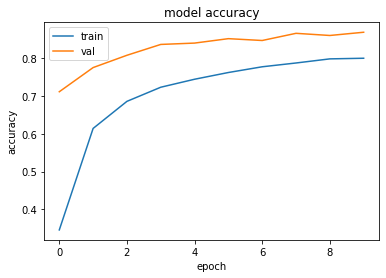

Train accuracy :  0.8002777695655823
Test accuracy :  0.8691428303718567


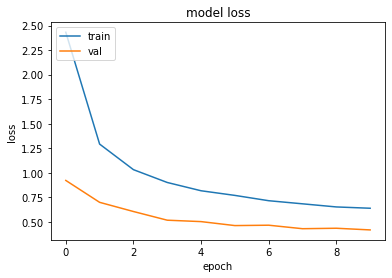

Train loss :  0.6388667821884155
Test loss :  0.4180956184864044


In [ ]:
import keras
epoch=10
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print("Train accuracy : ",history.history['accuracy'][epoch -1])
print("Test accuracy : ",history.history['val_accuracy'][epoch -1])


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print("Train loss : ",history.history['loss'][epoch -1])
print("Test loss : ",history.history['val_loss'][epoch -1])

# Random Test

prediction : ই
Loaded Image
Train accuracy :  0.8002777695655823
Test accuracy :  0.8691428303718567


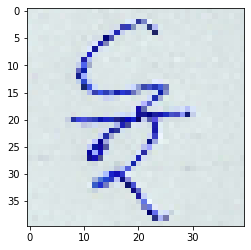

In [ ]:
img = image.load_img('3.1.jpg',target_size=(40,40,3))
plt.imshow(img)
output(img) 
print("Loaded Image")
print("Train accuracy : ",history.history['accuracy'][epoch -1])
print("Test accuracy : ",history.history['val_accuracy'][epoch -1])

prediction : আ
Loaded Image
Train accuracy :  0.8002777695655823
Test accuracy :  0.8691428303718567


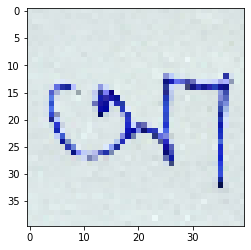

In [ ]:
img = image.load_img('1.1.jpg',target_size=(40,40,3))
plt.imshow(img)
output(img) 
print("Loaded Image")
print("Train accuracy : ",history.history['accuracy'][epoch -1])
print("Test accuracy : ",history.history['val_accuracy'][epoch -1])

prediction : ল
Loaded Image
Train accuracy :  0.8002777695655823
Test accuracy :  0.8691428303718567


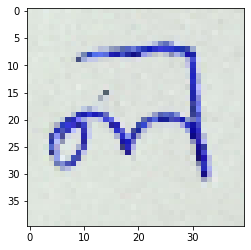

In [ ]:
img = image.load_img('5.jpg',target_size=(40,40,3))
plt.imshow(img)
output(img) 
print("Loaded Image")
print("Train accuracy : ",history.history['accuracy'][epoch -1])
print("Test accuracy : ",history.history['val_accuracy'][epoch -1])

prediction : ঊ
Loaded Image
Train accuracy :  0.8002777695655823
Test accuracy :  0.8691428303718567


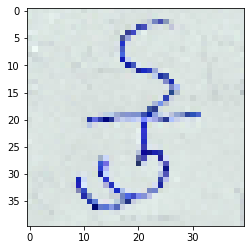

In [ ]:
img = image.load_img('3.jpg',target_size=(40,40,3))
plt.imshow(img)
output(img) 
print("Loaded Image")
print("Train accuracy : ",history.history['accuracy'][epoch -1])
print("Test accuracy : ",history.history['val_accuracy'][epoch -1])